In [129]:
#We are using fredapi to fetch the economic data
%pip install fredapi > /dev/null

Note: you may need to restart the kernel to use updated packages.


#### We will require a fred api key to fetch data. Using api to fetch data eliminates the need of scraping or downloading data from different sources.
#### Use following link to create your api key: https://fredaccount.stlouisfed.org/apikey 

#### I have stored my api key in apiKey.json and importing it in credentials variable. Create your own API key and store it in json file. You can use all the secret variables by loading this file. Do not forget to add that file in gitignore.

In [146]:
base_dir = '/Users/shubhamk/Documents/GitHub/Economic_Data_Analysis/'

In [4]:
#Loading API key in api_key variable
import json
try:
    with open('apiKey.json') as file:
        credentials = json.load(file)
except FileNotFoundError:
    print("File not found")
api_key = credentials['fredAPI']

In [98]:
#Importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

In [145]:
#Style fivethirtyeight offers a clean and minimal look for the graphs and plots
plt.style.use('fivethirtyeight')

#Setting macimum number of columns to 500
pd.set_option('display.max_columns', 500)

#Getting the list od default colors
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]




In [5]:
#Importing Fred API 
from fredapi import Fred

#Assign API key 
fred_key = api_key

In [6]:
#Creating a Fred object
fred = Fred(api_key=fred_key)

#### Fred API offers two main options to get data.
#### 1. Search: Allwos us to search the economic data series using keywords. Matching series ids can be used to pull data for analysis and visualization.
#### 2 Pull: Once we identify the data series, we can use get_series() to pull the data for further analysis.

In [136]:
#Searching revelant data series of S&P500, ordering result by popularity
sp_search = fred.search('S&P',order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-09-29,2024-09-29,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-09-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-27 08:07:12-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-09-29,2024-09-29,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-09-25 10:50:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-09-29,2024-09-29,S&P 500,2014-09-29,2024-09-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-27 19:16:31-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-09-29,2024-09-29,Real Median Household Income in the United States,1984-01-01,2023-01-01,Annual,A,2023 CPI-U-RS Adjusted Dollars,2023 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:01-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-09-29,2024-09-29,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-09-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-27 08:07:14-05:00,82,This data represents the effective yield of th...


#### With the search function, we got the revelant data series. Now, we can use series id to pull the required data.

In [137]:
#Pulling data from series SP500 
sp500 = fred.get_series(series_id='SP500')

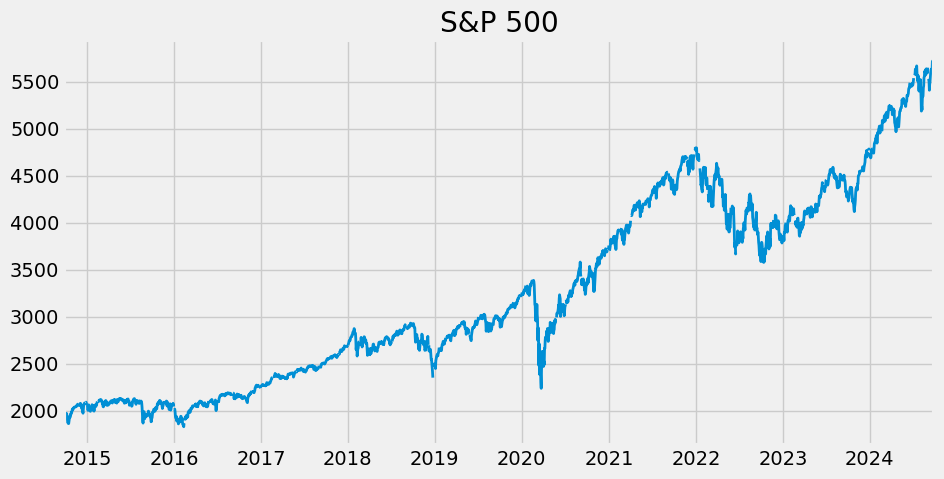

In [138]:
#Plotting the data points of SP500 data series
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)
plt.savefig(base_dir+'S&P500.png')
plt.show()



#### Now, lets search for unemployement data.

In [105]:
#Using fred object with search function 
fred.search('unemployment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-10-01,2024-10-01,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-10-01,2024-10-01,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-10-01,2024-10-01,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-10-01,2024-10-01,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-10-01,2024-10-01,Continued Claims (Insured Unemployment),1967-01-07,2024-09-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-09-26 07:40:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-10-01,2024-10-01,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-10-01,2024-10-01,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-10-01,2024-10-01,Unemployment Rate - Married Women,1955-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:22-05:00,9,To obtain estimates of women worker employment...


#### Checking out the data from data series UNRATE


In [106]:
fred.get_series('UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
2024-08-01    4.2
Length: 920, dtype: float64

#### There are thousands of data series available for unemployment rate data. Lets try to filter out and get the statewise unemloyment data. We can use filter argument or query function to get the specific data series.

In [107]:
unemp_df = fred.search('Unemployement rate state', filter=('frequency', 'Monthly'))
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-10-01,2024-10-01,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-10-01,2024-10-01,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-10-01,2024-10-01,Unemployment Rate - Black or African American,1972-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:16-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-10-01,2024-10-01,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2024-10-01,2024-10-01,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2024-09-06 07:46:37-05:00,27,The series comes from the 'Current Population ...


In [108]:
unemp_df.shape

(1000, 15)

In [109]:
#Using query function to filter the results
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-10-01,2024-10-01,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-10-01,2024-10-01,Unemployment Rate - Black or African American,1972-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:16-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-10-01,2024-10-01,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:17-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-10-01,2024-10-01,Unemployment Rate in California,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:02-05:00,64,None
TXUR,TXUR,2024-10-01,2024-10-01,Unemployment Rate in Texas,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:03-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M08311USM156SNBR,M08311USM156SNBR,2024-10-01,2024-10-01,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS13008397,LNS13008397,2024-10-01,2024-10-01,"Of Total Unemployed, Percent Unemployed Less T...",1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:39-05:00,6,The series comes from the 'Current Population ...
LBSSA20,LBSSA20,2024-10-01,2024-10-01,Labor Force Participation Rate for Kansas,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:13-05:00,6,A state's labor-force participation rate is th...


In [110]:
#Filtering further based on title
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-10-01,2024-10-01,Unemployment Rate in California,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:02-05:00,64,None
TXUR,TXUR,2024-10-01,2024-10-01,Unemployment Rate in Texas,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:03-05:00,56,None
NYUR,NYUR,2024-10-01,2024-10-01,Unemployment Rate in New York,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:03-05:00,53,None
FLUR,FLUR,2024-10-01,2024-10-01,Unemployment Rate in Florida,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:04-05:00,51,None
PAUR,PAUR,2024-10-01,2024-10-01,Unemployment Rate in Pennsylvania,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:05-05:00,44,None
OHUR,OHUR,2024-10-01,2024-10-01,Unemployment Rate in Ohio,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:05-05:00,41,None
MIUR,MIUR,2024-10-01,2024-10-01,Unemployment Rate in Michigan,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:05-05:00,38,None
ALUR,ALUR,2024-10-01,2024-10-01,Unemployment Rate in Alabama,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:06-05:00,38,None
MAUR,MAUR,2024-10-01,2024-10-01,Unemployment Rate in Massachusetts,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:06-05:00,37,None


In [111]:
#Checking out the length and shape of dataframe
print(unemp_df.index)
print(len(unemp_df))
unemp_df.shape

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR',
       'NEUR', 'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'RIUR', 'KSUR',
       'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR',
       'CNEWUR'],
      dtype='object', name='series id')
59


(59, 15)

In [112]:
#Checking a single data series 
for myid in unemp_df.index:
    results = fred.get_series(myid)
    break
print(results)

1976-01-01    9.2
1976-02-01    9.2
1976-03-01    9.1
1976-04-01    9.1
1976-05-01    9.0
             ... 
2024-04-01    5.3
2024-05-01    5.2
2024-06-01    5.2
2024-07-01    5.2
2024-08-01    5.3
Length: 584, dtype: float64


In [113]:
type(results)

pandas.core.series.Series

In [114]:
#Converting series to dataframe with to_frame() function
results.to_frame(name=myid)

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2024-04-01,5.3
2024-05-01,5.2
2024-06-01,5.2
2024-07-01,5.2


#### Here, we have used for loop to iterate over all the series in unemp_df. We are accessing every series id and appending the data in all_states list.

In [117]:
#Fetching data for all the states using for loop
all_states = []

for myid in unemp_df.index:
    state = fred.get_series(myid)
    state = state.to_frame(name=myid)
    all_states.append(state)

In [118]:
type(all_states)
all_states[2]

,NYUR
1976-01-01,10.3
1976-02-01,10.3
1976-03-01,10.2
1976-04-01,10.2
1976-05-01,10.1
...,...
2024-04-01,4.2
2024-05-01,4.2
2024-06-01,4.2
2024-07-01,4.3


In [119]:
unemp_states = pd.concat(all_states, axis=1)
unemp_states

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,...,KSUR,WYUR,DEUR,VTUR,SDUR,CMWRUR,CSOUUR,CNERUR,CWSTUR,CNEWUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.2,6.8,6.9,9.6,8.6,9.6
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,...,4.2,4.0,8.1,8.6,3.1,6.7,6.8,9.5,8.5,9.4
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,...,4.2,3.9,8.3,8.5,3.1,6.6,6.7,9.5,8.5,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,...,2.8,2.8,3.9,2.1,2.0,3.6,3.5,3.9,4.6,3.3
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,...,2.9,2.9,3.9,2.1,2.0,3.7,3.5,3.9,4.6,3.4
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,...,3.0,2.9,4.0,2.1,2.0,3.8,3.5,3.8,4.5,3.3
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,...,3.2,2.9,4.1,2.1,2.0,4.0,3.6,3.9,4.6,3.4


#### From above dataframe, we got to know that some of the columns contain null values

In [120]:
unemp_states['LASMT261982000000003']
unemp_states['LASMT391746000000003']

1976-01-01    NaN
1976-02-01    NaN
1976-03-01    NaN
1976-04-01    NaN
1976-05-01    NaN
             ... 
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.0
2024-07-01    4.1
2024-08-01    NaN
Freq: MS, Name: LASMT391746000000003, Length: 584, dtype: float64

In [121]:
type(unemp_states)

pandas.core.frame.DataFrame

In [122]:
unemp_states = unemp_states.drop(['LASMT261982000000003', 'LASMT391746000000003'], axis=1)

In [123]:
unemp_states.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2024-04-01    0
2024-05-01    0
2024-06-01    0
2024-07-01    0
2024-08-01    0
Freq: MS, Length: 584, dtype: int64

In [124]:
#Finding out the columns with null values
columns_with_nan = unemp_states.columns[unemp_states.isna().any()].tolist()
columns_with_nan

['PRUR']

In [125]:
unemp_states['PRUR'].isnull().sum()

2

In [126]:
unemp_states = unemp_states.drop('PRUR', axis=1)

In [127]:
unemp_states.isna().sum().sum()

0

#### As we made sure that the data doesn't have any Null values. Lets try to plot it

In [128]:
from plotly.io import write_image

#### Changing x-axis values to state names

In [129]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [130]:
unemp = px.line(unemp_states, title='Statewise Unemployment Rate')
unemp.write_image("/Users/shubhamk/Documents/GitHub/Economic_Data_Analysis/Statewise_Unemployment.png")


In [163]:
unemp

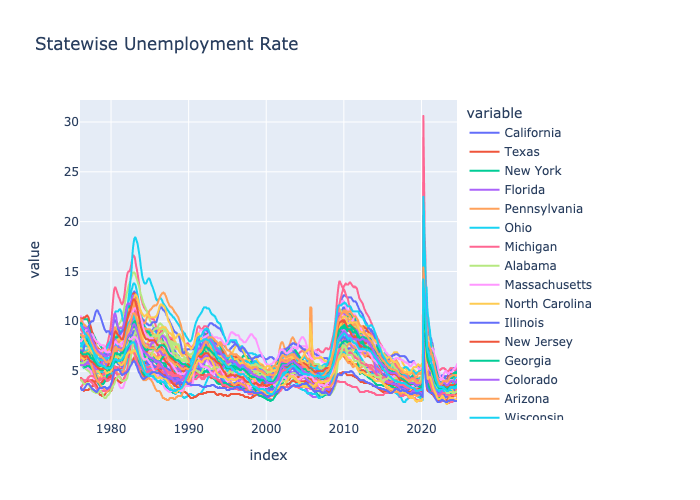

#### We can see a sudden surge in unemployment rate on April 2020. Let dig deeper into that time period and get more insights about unemployment.

In [131]:
unemp_states.loc[unemp_states.index == '2020-04-01']

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Kansas,Wyoming,Delaware,Vermont,South Dakota,Midwest Census Region,South Census Region,Northeast Census Region,West Census Region,New England Census Division
2020-04-01,16.1,12.8,15.6,13.4,16.1,16.5,22.6,13.8,17.4,14.2,...,12.1,5.1,13.1,14.1,8.8,15.4,13.0,15.1,15.4,14.2


#### Lets create a bar plot for the data from April 2020

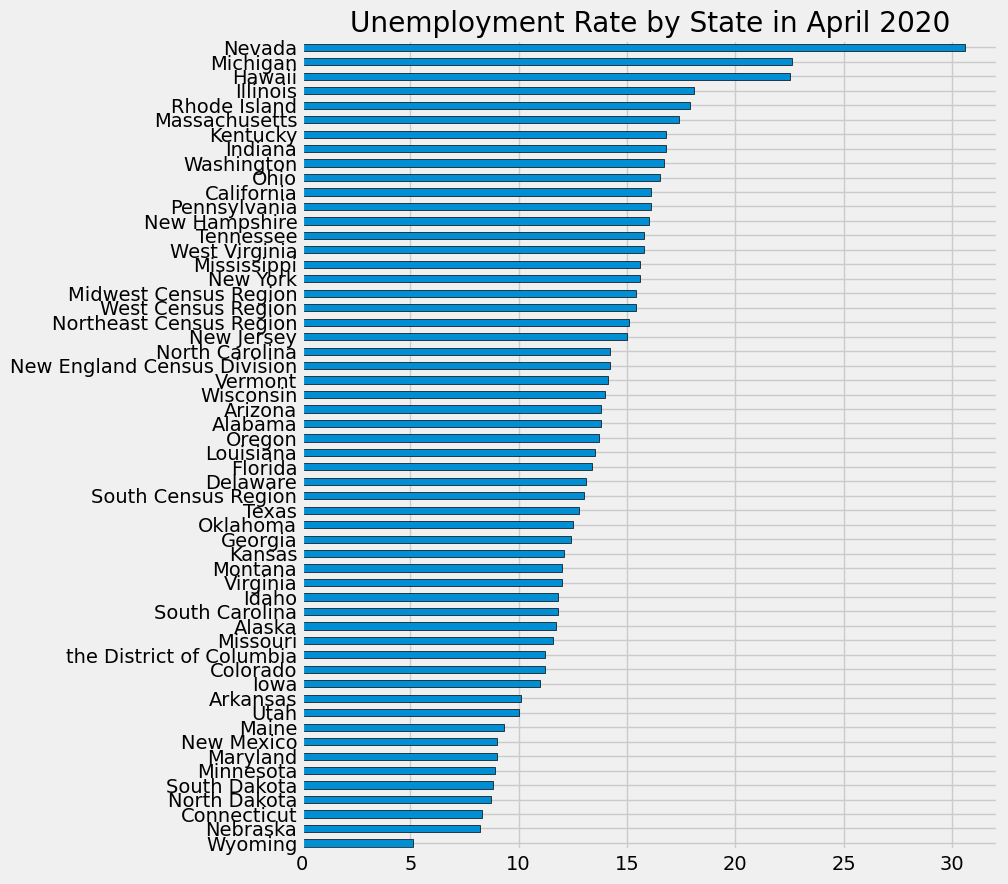

In [147]:
#Transforming data
unemp_april = unemp_states.loc[unemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8, 10), title='Unemployment Rate by State in April 2020', edgecolor = 'black')
unemp_april.legend().remove()
plt.savefig(base_dir+'Umeployment_April2020.png')
plt.show()


#### Pulling Participation Rate

In [79]:
fred.search('participation rate state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
T10YIE,T10YIE,2024-10-01,2024-10-01,10-Year Breakeven Inflation Rate,2003-01-02,2024-09-30,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-30 16:01:11-05:00,89,The breakeven inflation rate represents a meas...
T10YIEM,T10YIEM,2024-10-01,2024-10-01,10-Year Breakeven Inflation Rate,2003-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-03 16:01:04-05:00,47,The breakeven inflation rate represents a meas...
CIVPART,CIVPART,2024-10-01,2024-10-01,Labor Force Participation Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:02-05:00,84,The series comes from the 'Current Population ...
T5YIE,T5YIE,2024-10-01,2024-10-01,5-Year Breakeven Inflation Rate,2003-01-02,2024-09-30,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-30 16:01:13-05:00,83,The breakeven inflation rate represents a meas...
LNU01300000,LNU01300000,2024-10-01,2024-10-01,Labor Force Participation Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:35-05:00,27,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CBR22033LAA647NCEN,CBR22033LAA647NCEN,2024-10-01,2024-10-01,SNAP Benefits Recipients in East Baton Rouge P...,1989-01-01,2021-01-01,Annual,A,Persons,Persons,Not Seasonally Adjusted,NSA,2023-12-14 13:14:37-06:00,4,The U.S. Census Bureau provides annual estimat...
CBR46083SDA647NCEN,CBR46083SDA647NCEN,2024-10-01,2024-10-01,"SNAP Benefits Recipients in Lincoln County, SD",1989-01-01,2021-01-01,Annual,A,Persons,Persons,Not Seasonally Adjusted,NSA,2023-12-14 13:55:15-06:00,4,The U.S. Census Bureau provides annual estimat...
CBR12069FLA647NCEN,CBR12069FLA647NCEN,2024-10-01,2024-10-01,"SNAP Benefits Recipients in Lake County, FL",1989-01-01,2021-01-01,Annual,A,Persons,Persons,Not Seasonally Adjusted,NSA,2023-12-14 13:55:39-06:00,4,The U.S. Census Bureau provides annual estimat...


In [80]:
fred.search('Labor Force Participation Rate', filter=('frequency', 'Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-10-01,2024-10-01,Labor Force Participation Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:02-05:00,84,The series comes from the 'Current Population ...
LNU01300000,LNU01300000,2024-10-01,2024-10-01,Labor Force Participation Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:35-05:00,27,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-10-01,2024-10-01,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:04-05:00,70,The series comes from the 'Current Population ...
LNU01300060,LNU01300060,2024-10-01,2024-10-01,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:24-05:00,41,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-10-01,2024-10-01,Labor Force Participation Rate - Women,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:05-05:00,66,To obtain estimates of women worker employment...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRAC74FEILM156N,LRAC74FEILM156N,2024-10-01,2024-10-01,Infra-Annual Labor Statistics: Labor Force Par...,2012-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-16 14:12:52-05:00,0,OECD Data Filters: REF_AREA: ISR MEASURE: LF_...
LRAC24MAAUM156N,LRAC24MAAUM156N,2024-10-01,2024-10-01,Infra-Annual Labor Statistics: Labor Force Par...,1978-02-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-16 14:14:03-05:00,0,OECD Data Filters: REF_AREA: AUS MEASURE: LF_...
LRAC24MAAUM156S,LRAC24MAAUM156S,2024-10-01,2024-10-01,Infra-Annual Labor Statistics: Labor Force Par...,1978-02-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-16 14:14:03-05:00,0,OECD Data Filters: REF_AREA: AUS MEASURE: LF_...


In [81]:
part_df = fred.search('Labor Force Participation Rate', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [82]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-10-01,2024-10-01,Labor Force Participation Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:02-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-10-01,2024-10-01,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:04-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-10-01,2024-10-01,Labor Force Participation Rate - Women,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:05-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2024-10-01,2024-10-01,Labor Force Participation Rate - Men,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:06-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-10-01,2024-10-01,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:07-05:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRAC25TTCLM156S,LRAC25TTCLM156S,2024-10-01,2024-10-01,Infra-Annual Labor Statistics: Labor Force Par...,2005-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-17 14:27:14-05:00,0,OECD Data Filters: REF_AREA: CHL MEASURE: LF_...
LRAC25TTKRM156S,LRAC25TTKRM156S,2024-10-01,2024-10-01,Infra-Annual Labor Statistics: Labor Force Par...,1999-06-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-16 14:11:43-05:00,0,OECD Data Filters: REF_AREA: KOR MEASURE: LF_...
COLLRACTTFESTSAM,COLLRACTTFESTSAM,2024-10-01,2024-10-01,Infra-Annual Labor Statistics: Labor Force Par...,2007-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-16 14:13:23-05:00,0,OECD Data Filters: REF_AREA: COL MEASURE: LF_...


In [83]:
part_df = part_df[~part_df['title'].str.contains('Infra-Annual Labor Statistics', case=False, na=False)]

In [84]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-10-01,2024-10-01,Labor Force Participation Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:02-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-10-01,2024-10-01,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:04-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-10-01,2024-10-01,Labor Force Participation Rate - Women,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:05-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2024-10-01,2024-10-01,Labor Force Participation Rate - Men,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:06-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-10-01,2024-10-01,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:07-05:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBSSA10,LBSSA10,2024-10-01,2024-10-01,Labor Force Participation Rate for Delaware,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:18-05:00,1,A state's labor-force participation rate is th...
LBSSA56,LBSSA56,2024-10-01,2024-10-01,Labor Force Participation Rate for Wyoming,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:16-05:00,4,A state's labor-force participation rate is th...
LNS11300018,LNS11300018,2024-10-01,2024-10-01,"Labor Force Participation Rate - 16-19 Yrs., B...",1972-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:48-05:00,3,The series comes from the 'Current Population ...


In [85]:
#Labor Force Participation Rate -
part_df = part_df[~part_df['title'].str.contains('Labor Force Participation Rate -', case=False, na=False)]

In [86]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-10-01,2024-10-01,Labor Force Participation Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:02-05:00,84,The series comes from the 'Current Population ...
LBSSA06,LBSSA06,2024-10-01,2024-10-01,Labor Force Participation Rate for California,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:05-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2024-10-01,2024-10-01,Labor Force Participation Rate for Alabama,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:07-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2024-10-01,2024-10-01,Labor Force Participation Rate for New York,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2024-10-01,2024-10-01,Labor Force Participation Rate for Michigan,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2024-10-01,2024-10-01,Labor Force Participation Rate for Mississippi,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:02-05:00,21,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2024-10-01,2024-10-01,Labor Force Participation Rate for Texas,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:05-05:00,20,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2024-10-01,2024-10-01,Labor Force Participation Rate for Florida,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,20,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2024-10-01,2024-10-01,Labor Force Participation Rate for Kentucky,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,20,A state's labor-force participation rate is th...


In [87]:
part_df.shape

(54, 15)

Deleting first and last two columns as they didnt belong to state

In [88]:
part_df = part_df.drop(['CIVPART', 'LRIN64MACLM156S', 'LRIN64FECLM156S'], axis=0)

In [89]:
#Extracting data to csv just to check data quality
#part_df.to_csv('data1.csv', index=False) 

In [101]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
part_id_to_state

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA54': 'West Virginia',
 'LBSSA27': 'Minnesota',
 'LBSSA47': 'Tennessee',
 'LBSSA24': 'Maryland',
 'LBSSA23': 'Maine',
 'LBSSA37': 'North Carolina',
 'LBSSA17': 'Illinois',
 'LBSSA22': 'Louisiana',
 'LBSSA13': 'Georgia',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [99]:
all_part_states = []
for myid in part_df.index:
    part_results = fred.get_series(myid)
    part_results = part_results.to_frame(name=myid)
    all_part_states.append(part_results)
all_part_states = pd.concat(all_part_states, axis = 1)



In [102]:
all_part_states.columns = [part_id_to_state[c] for c in all_part_states.columns]

In [103]:
all_part_states

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,...,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,District Of Columbia,Rhode Island,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,...,65.9,63.6,64.2,62.6,64.6,65.1,64.4,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,...,65.6,63.4,64.1,62.4,64.4,65.0,64.5,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,...,65.6,63.2,64.0,62.3,64.4,64.9,64.5,63.6,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,...,65.7,63.5,64.1,62.5,64.3,65.0,64.5,63.7,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,...,66.0,63.6,64.3,62.6,64.3,65.1,64.4,63.6,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,62.0,57.5,61.3,62.3,53.7,64.2,59.3,57.1,61.8,65.6,...,65.5,65.5,64.6,69.0,67.6,66.1,72.8,64.7,60.1,63.0
2024-05-01,62.0,57.5,61.3,62.3,53.8,64.2,59.1,57.3,61.9,65.6,...,65.6,65.6,64.7,68.9,67.5,66.1,72.7,64.9,59.9,62.9
2024-06-01,62.0,57.5,61.3,62.3,54.0,64.3,58.9,57.4,62.1,65.5,...,65.6,65.7,64.6,68.9,67.5,66.1,72.6,65.1,59.8,63.0
2024-07-01,62.0,57.5,61.3,62.4,54.2,64.4,58.8,57.6,62.3,65.5,...,65.6,65.7,64.4,68.9,67.5,66.1,72.5,65.2,59.8,63.1


#### Plotting Unemployment vs Participation Rate

####

Text(0.5, 1.0, 'New York')

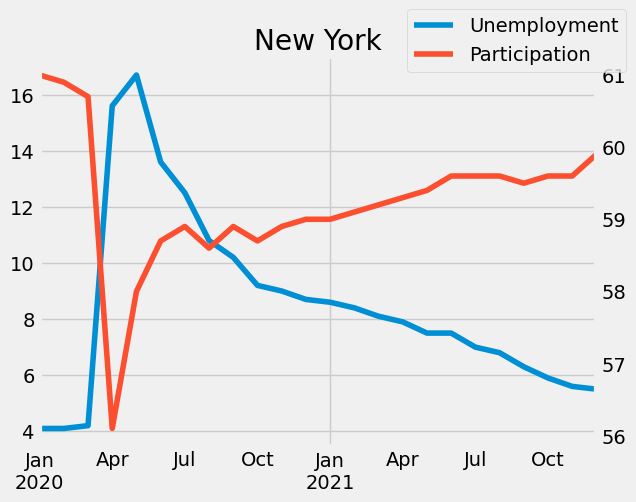

In [158]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index < 2022')['New York'] \
    .plot(ax=ax)
all_part_states.query('index >= 2020 and index < 2022')['New York'] \
    .plot(ax=ax2, color=color_pal[1])
fig.legend(labels=['Unemployment','Participation'])

ax2.grid(False)
ax.set_title('New York')

#### Plotting for all states

In [162]:
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})


i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

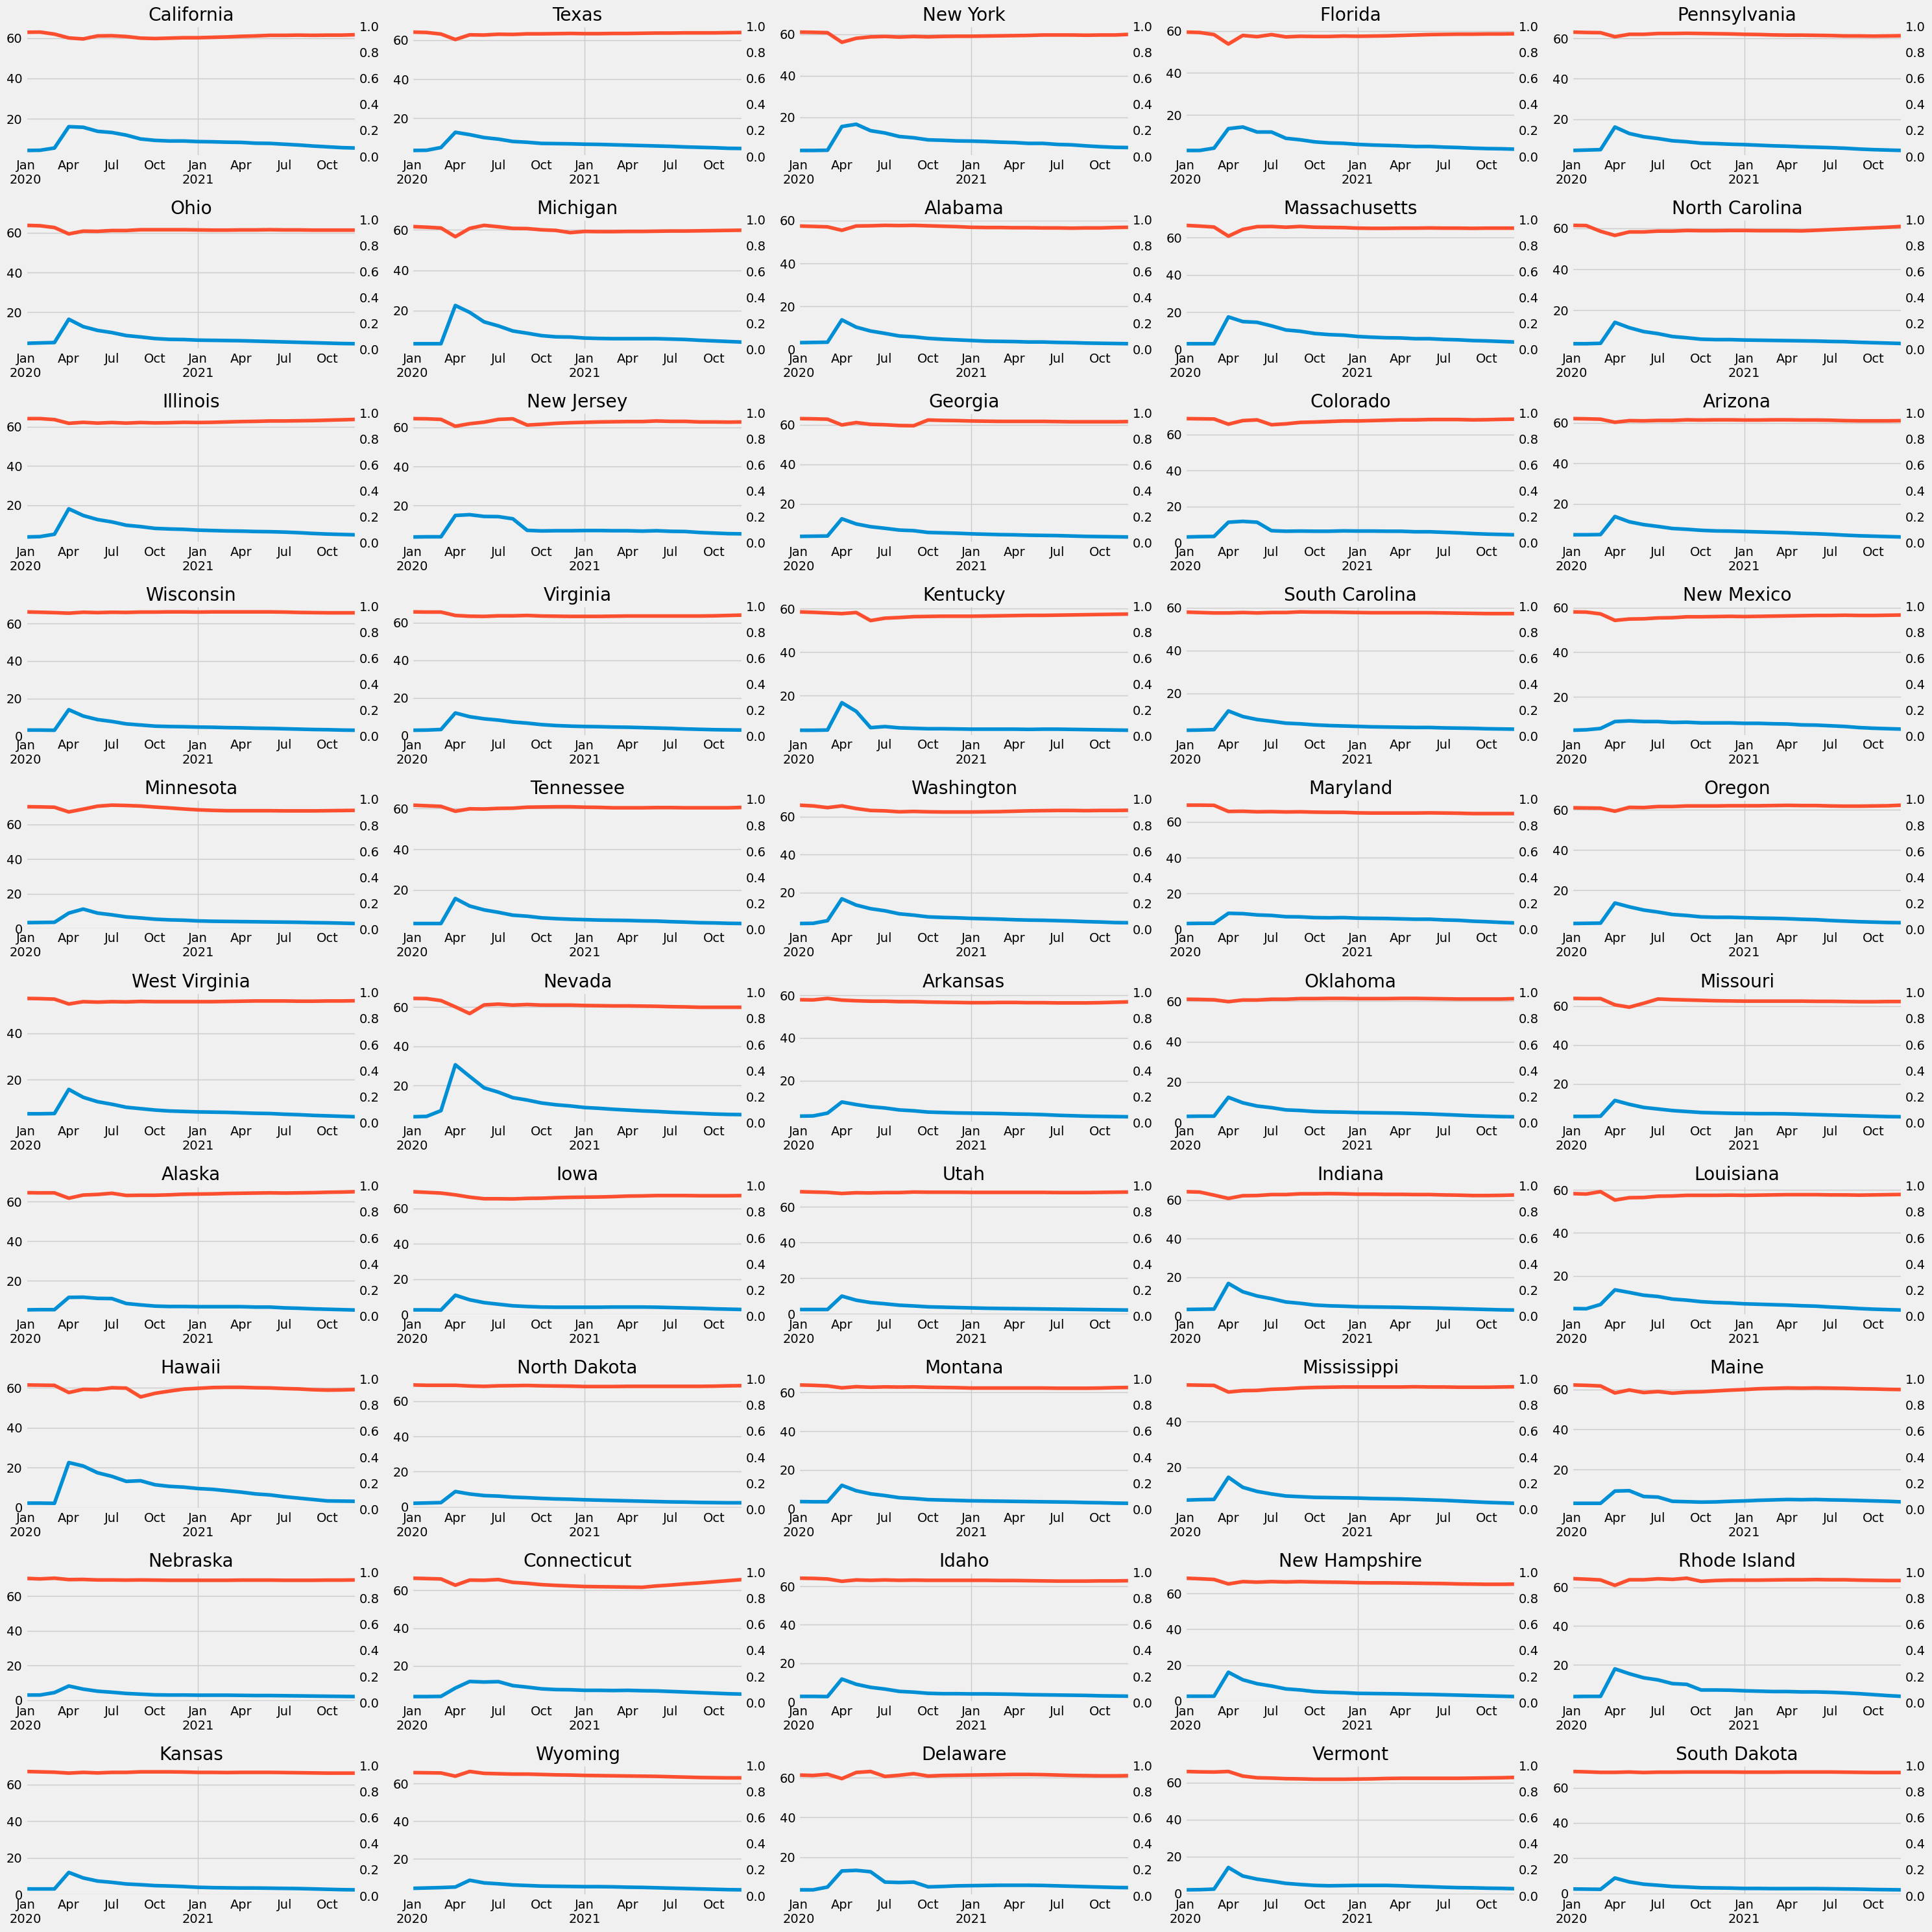

In [172]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30))
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state in [ "District Of Columbia", "Puerto Rico","Midwest Census Region", "South Census Region", "Northeast Census Region", "West Census Region", "New England Census Division"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=axs[i], label='Unemployment')
    all_part_states.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=axs[i], label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i+=1
plt.tight_layout()
plt.show()